## Diabetes Prediction using Machine Learning

### **Problem Statement**

Diabetes is a chronic disease that affects millions worldwide. Early prediction can help in preventive care. Using patient health data (like glucose levels, BMI, age, etc.), we aim to build classification models that can predict whether a patient is likely to have diabetes.

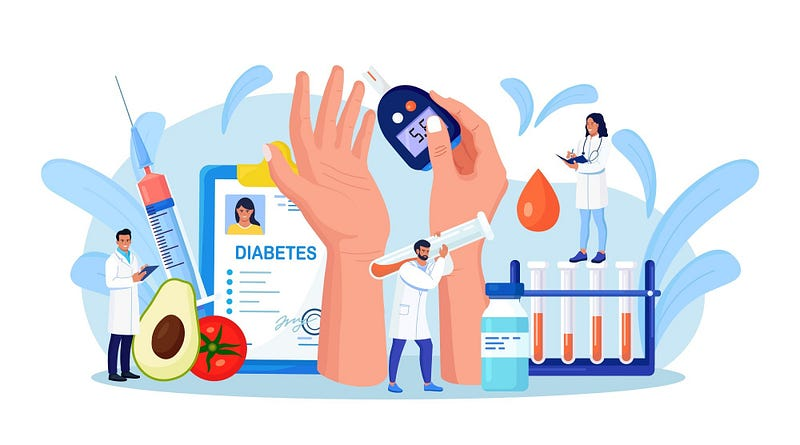

### **Dataset**

The most commonly used dataset is the **[Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)** (available on Kaggle or UCI Repository).

### **Data Information**
1. **Pregnancies** — Number of times the individual has been pregnant.
2. **Glucose** — Blood sugar level measured 2 hours after a glucose test.
3. **BloodPressure** — Diastolic blood pressure (mm Hg).
4. **SkinThickness** — Triceps skinfold thickness (mm) to estimate body fat.
5. **Insulin** — 2-hour serum insulin level (μU/ml).
6. **BMI** — Body Mass Index (kg/m²), indicating body fat.
7. **DiabetesPedigreeFunction** — Genetic likelihood of diabetes based on family history.
8. **Age** — Age of the individual (years).
9. **Outcome** — Target variable: 1 if diabetic, 0 if non-diabetic.

### Import required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### 1. Data Understanding:

#### A. Read the CSV file

In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### B. Print shape and Column of the dataset

In [4]:
# shape of the dataset
shape = diabetes.shape
print(f"Shape of the dataset:",shape)
print()
columns = diabetes.columns
print(f"Columns present in the dataset:\n", columns)

Shape of the dataset: (768, 9)

Columns present in the dataset:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


#### Observation:
There are 768 rows and 9 columns present in the dataset.

#### C. Information about the dataset

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Observation:
- The dataset contains **2 float-type features** and **7 integer-type features**.
- **Integer features:** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, and Outcome (target variable).
- **Float features:** BMI and DiabetesPedigreeFunction.
- There are **no missing values** in the dataset.

#### D. Check for missing values

In [6]:
missing_values = diabetes.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Observation:
As mentioned above, there are no missing values present in the dataset.

#### E. Check for duplicate values

In [7]:
duplicates = diabetes.duplicated().sum()

if duplicates==0:
    print("There are no duplicate values present in the dataset")
else:
    print("There are duplicate values present in the dataset")

There are no duplicate values present in the dataset


#### F. Check the number of unique rows in each column

In [8]:
numerical_columns = diabetes.select_dtypes(include=["number"]).columns

for col in numerical_columns:
    print(f"{col}: {diabetes[col].unique()}\n")

Pregnancies: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Glucose: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

BloodPressure: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

SkinThickness: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 

In [9]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

#### Observation:

- Most features are **continuous** with many unique values.
- Zeros in **Glucose, BloodPressure, SkinThickness, Insulin, and BMI** are not realistic → should be treated as missing values (NaN) before imputation.
- **Pregnancies & Age** are discrete counts, while DiabetesPedigreeFunction has the highest variability.
- **Outcome** is binary (target variable).

#### G. Replace 0 values in Glucose, BloodPressure, SkinThickness, Insulin, BMI with NaN.

In [10]:
# Columns where 0 is biologically invalid
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with NaN
diabetes[invalid_zero_cols] = diabetes[invalid_zero_cols].replace(0, np.nan)

#### H. Re-check for missing values and impute it

In [11]:
# Check how many missing values are there
print("Missing values after replacement:\n", diabetes.isna().sum())

Missing values after replacement:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [12]:
# Impute missing values with median 
for col in invalid_zero_cols:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())

# Verify
print("\nMissing values after imputation:\n", diabetes.isna().sum())


Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### I. Statistical summary

In [13]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observation:
1. **Pregnancies**
- Mean: ~3.8 pregnancies, max 17 → wide range.
- Median: 3 → distribution slightly right-skewed.

2. **Glucose**
- Mean: 121.7, median: 117 → some higher outliers.
- Max: 199 → possible extreme values, important predictor for diabetes.

3. **BloodPressure**
- Mean & median: ~72 → fairly symmetric distribution.
- Max: 122 → possible outliers.

4. **SkinThickness**
- Mean: ~29, median: 29 → fairly symmetric.
- Max: 99 → potential outlier, but biologically plausible.

5. **Insulin**
- Mean: ~140, median: 125 → highly skewed distribution.
- Max: 846 → strong outliers.

6. **BMI**
- Mean: ~32.45, median: 32.3 → slightly right-skewed.
- Max: 67.1 → extreme obesity cases.

7. **DiabetesPedigreeFunction**
- Mean: ~0.472, median: 0.3725 → skewed right.
- Max: 2.42 → extreme hereditary risk cases.

8. **Age**
- Mean: ~33.2, median: 29 → slight skew toward younger age group.
- Max: 81 → wide age range.

9. **Outcome**
- ~35% of samples have diabetes (Outcome=1), ~65% without diabetes → mild class imbalance.


Glucose, Insulin, BMI, and DiabetesPedigreeFunction show skewness and possible outliers, making them strong candidates for feature scaling and possibly log transformation before modeling.

### 2. Data Exploration and Analysis:

#### A. Visualize distribution of all the numerical variables using a histogram and clearly share insights

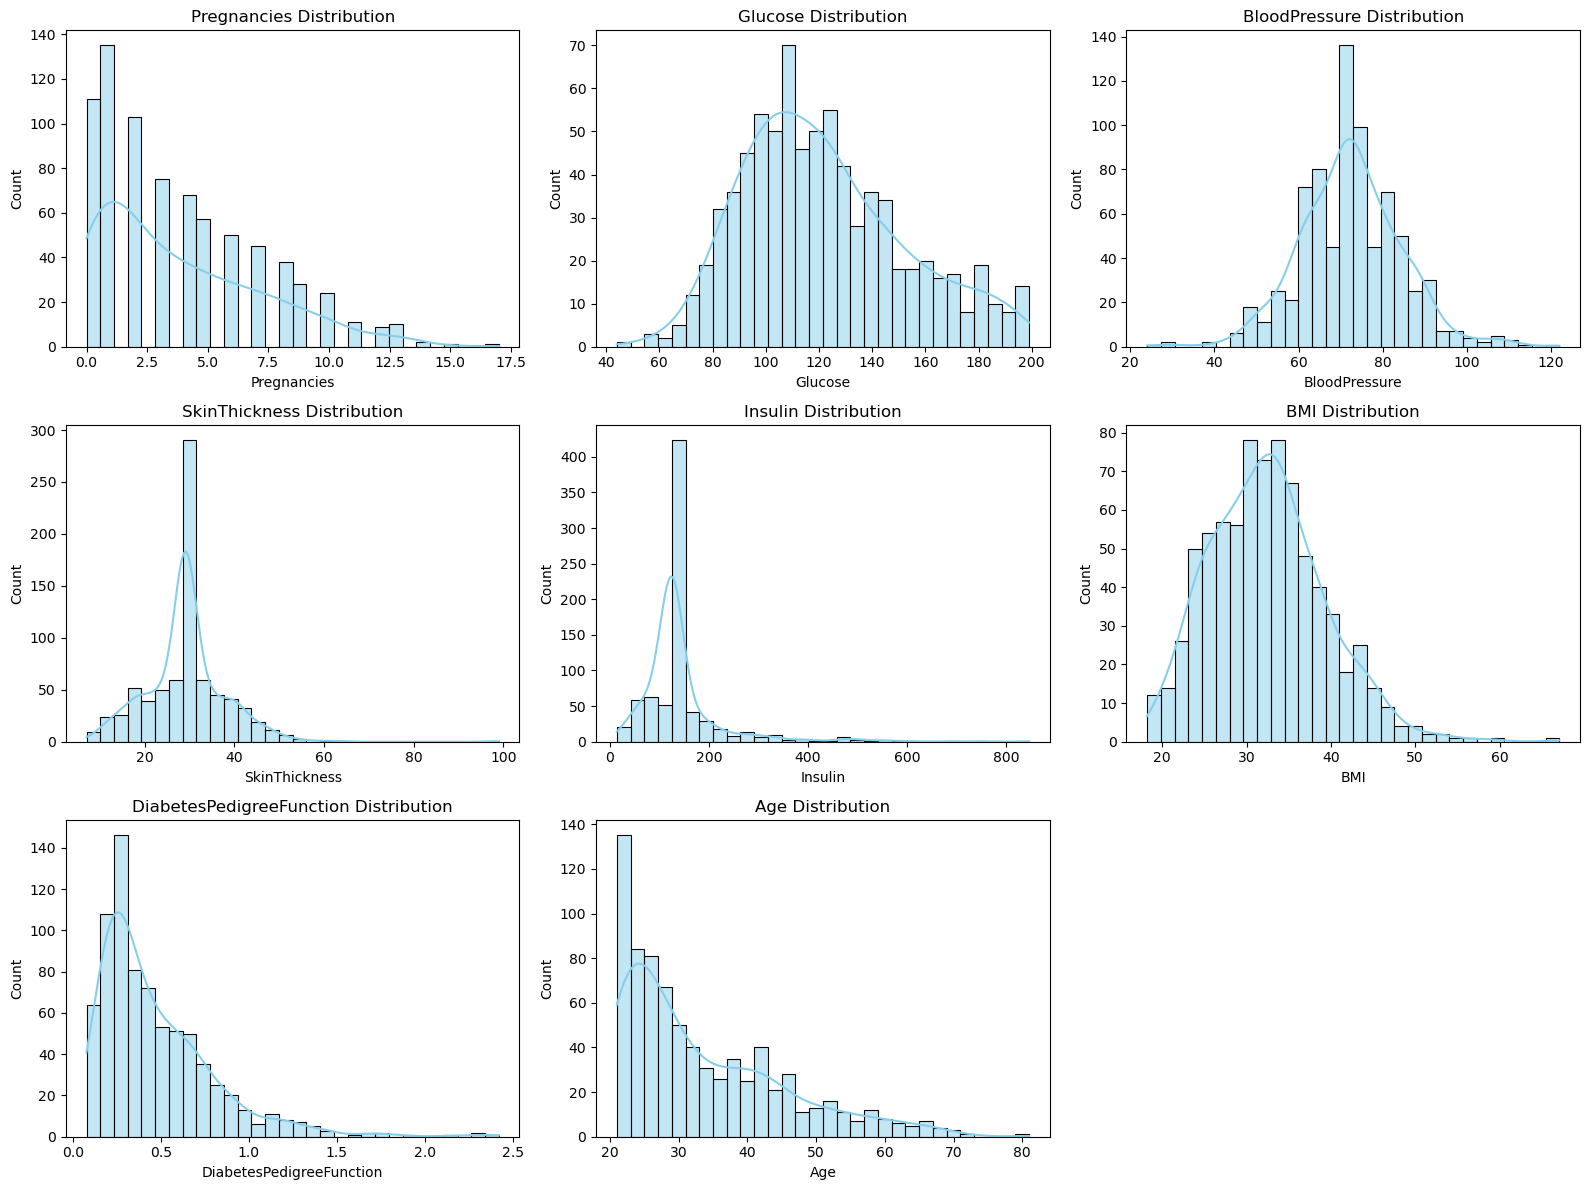

In [14]:
plt.figure(figsize=(16, 12))

numerical_columns = diabetes.select_dtypes(include=["number"]).columns.drop("Outcome")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(diabetes[col], kde=True, bins=30, color="skyblue")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### Observation:
1. **Pregnancies Distribution:**
- The distribution of pregnancies is **highly right-skewed**, with most values on the lower end.
- The **mode is 0 pregnancies**, making it the most frequent value.
- A **large portion** of individuals in the dataset have had **zero pregnancies**.
- The frequency **drops sharply** as the number of pregnancies increases.
- Very few individuals have **10 or more pregnancies**, which may be considered outliers.
- This pattern suggests the dataset includes women of varying ages, including many pre-reproductive, and in a medical study context (e.g., diabetes dataset), the high zero count is expected.

2. **Glucose:**
- Distribution is **right-skewed** with a long tail.
- Most glucose values fall in the **normal to slightly elevated range**.
- A noticeable number of individuals have **high glucose levels**, potential indicators of diabetes.
- Presence of extreme values suggests possible **outliers**.
- Mean glucose is higher than the median, confirming skewness.
- Glucose levels are critical for medical diagnosis, so distribution variation is expected.

3. **Blood Pressure:**
- Distribution is **slightly right-skewed**.
- Most values cluster around normal blood pressure ranges.
- A small portion of individuals have unusually **high or low blood pressure**.
- Mean and median are close, but slight skewness exists.
- Outliers may reflect measurement errors or special medical cases.
- Blood pressure variability is consistent with a diverse medical dataset.

4. **Skin Thickness**
- Highly **right-skewed** distribution.
- Many individuals have **low or zero values** (missing or unrecorded measurements).
- Very few have high skin thickness values.
- Mode is **0**, suggesting missing data or low measurement frequency.
- Outliers exist at the higher end of the distribution.
- Variability reflects differences in measurement and subject conditions.

5. **Insulin:**
- Highly **right-skewed** with many zero values.
- Large portion of individuals have **zero insulin levels** recorded.
- Some extreme high values act as **outliers**.
- Mean is much higher than the median, confirming skewness.
- Zero values may indicate missing data or normal low insulin levels in healthy individuals.
- Distribution reflects both healthy and diabetic cases in the dataset.

6. **BMI (Body Mass Index):**
- Distribution is **slightly right-skewed**.
- Most BMI values are clustered around normal to overweight ranges.
- Some individuals have very high BMI values, considered outliers.
- Mean BMI is slightly higher than median, confirming skewness.
- Few individuals are underweight or extremely overweight.
- BMI variation is expected in a medical dataset covering diverse populations.

7. **Diabetes Pedigree Function:**
- Distribution is **right-skewed**.
- Most values are concentrated at the lower end.
- A few individuals have high pedigree values, indicating **strong genetic influence**.
- Mean is higher than median, confirming skewness.
- Outliers are present at the higher end.
- Distribution reflects genetic diversity within the dataset.

8. **Age**
- Distribution is **slightly right-skewed**.
- Most individuals are clustered in the **younger to middle age** ranges.
- Few individuals belong to older age groups, creating a tail.
- Mean age is slightly higher than median.
- Outliers exist in the higher age range.
- Age variation reflects a diverse study sample population.

#### B. Visualize outliers present in all the numerical variables using a boxplot  and clearly share insights

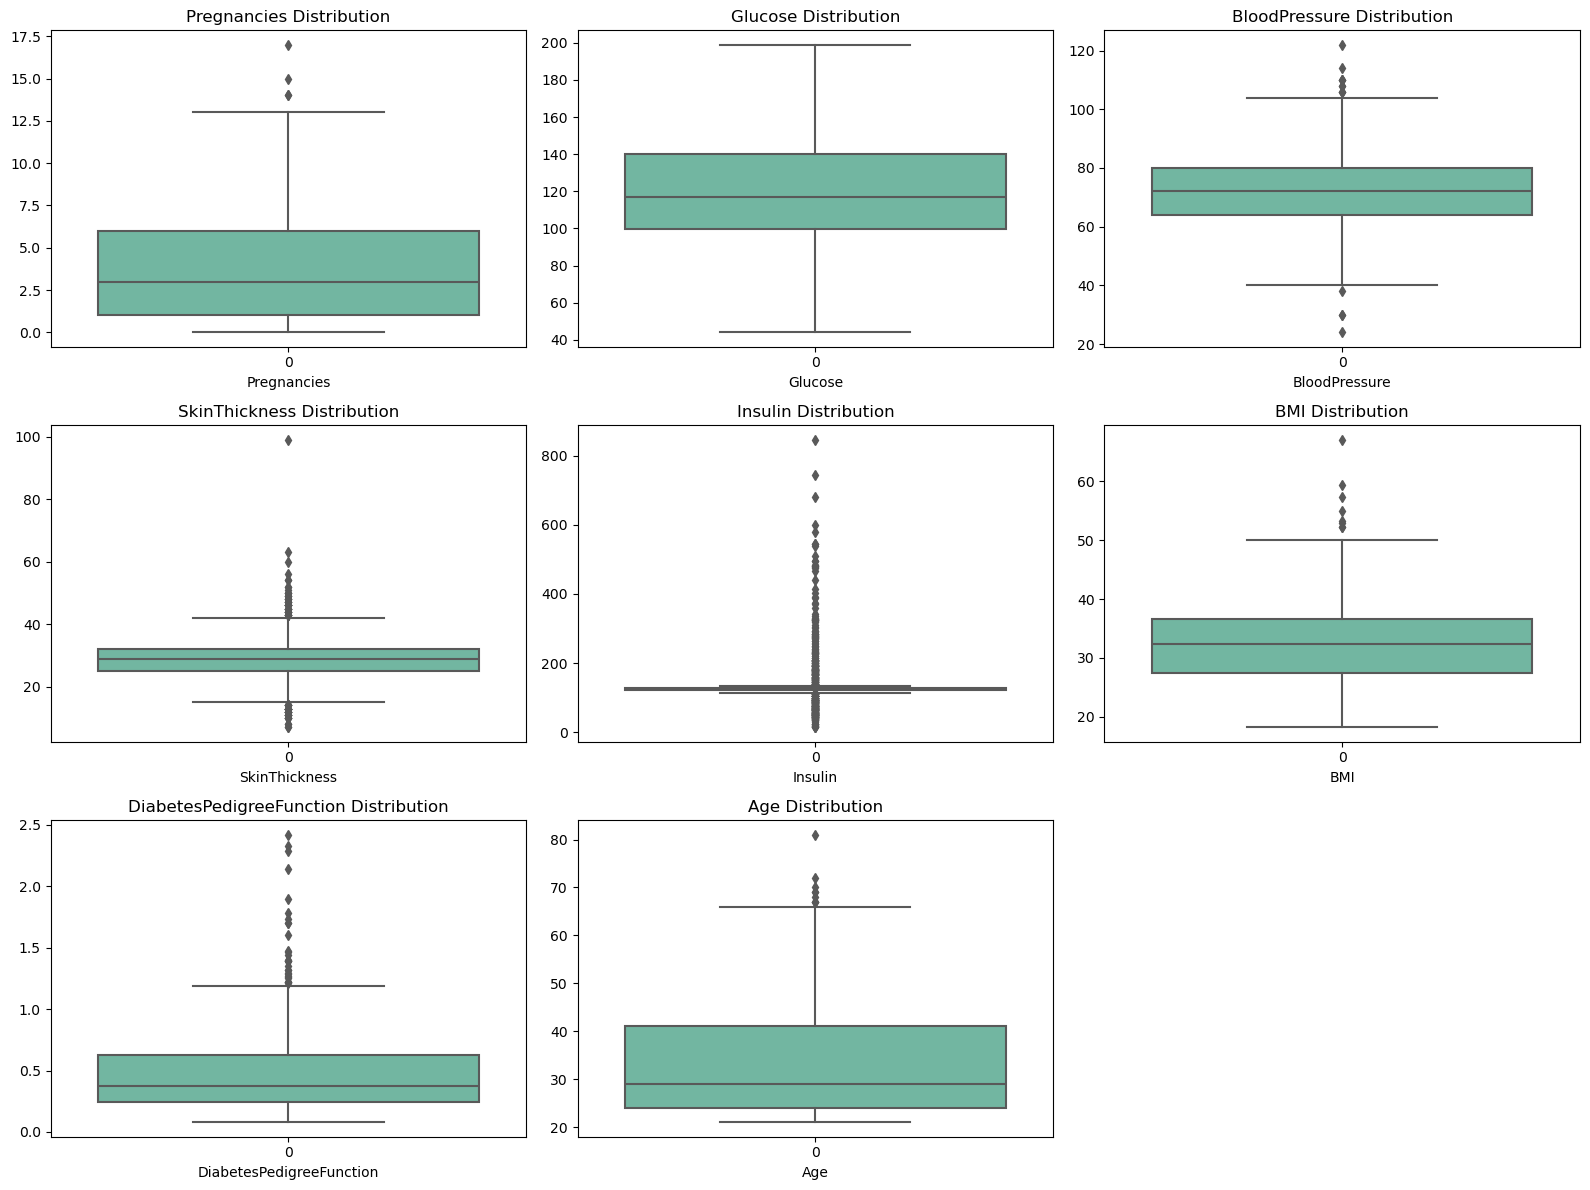

In [15]:
plt.figure(figsize=(16, 12))

numerical_columns = diabetes.select_dtypes(include=["number"]).columns.drop("Outcome")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(diabetes[col], palette="Set2")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### Observation:
- Most features show **right skewness** with longer upper whiskers.
- *Pregnancies, Glucose, Skin Thickness*, and *Insulin* have pronounced skewness and **many high-value outliers**.
- Blood Pressure and *BMI* show **moderate skewness** with fewer outliers.
- Diabetes Pedigree Function has a **narrow IQR** with some extreme high values.
- Age has a wider spread, concentrated in **young to middle age**, with a few older outliers.
- Boxplots confirm skewness seen in histograms and highlight **important outliers** for further analysis.

#### C. Visualize distribution of target variable using countplot and clearly share insights

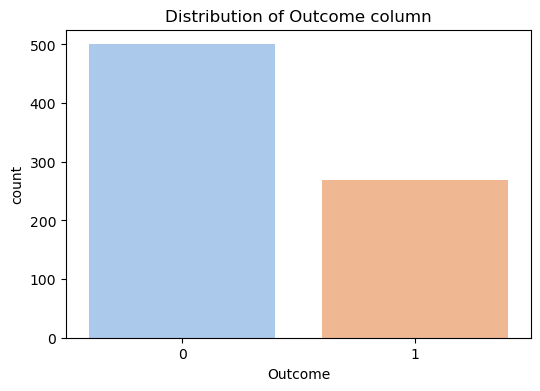

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data= diabetes, x="Outcome", palette="pastel")
plt.title(f"Distribution of Outcome column")
plt.show()

#### Observation:
- The dataset is imbalanced, with more individuals in the Outcome = 0 category.
- 500 samples (65%) belong to Outcome = 0 (non-diabetic).
- 268 samples (35%) belong to Outcome = 1 (diabetic).
- Non-diabetic cases significantly outnumber diabetic cases.
- This imbalance should be considered during model training to avoid bias.

#### D. Visualize a corrilation matrix and clearly share insights.

In [17]:
# Compute correlation matrix
corr_matrix = diabetes.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


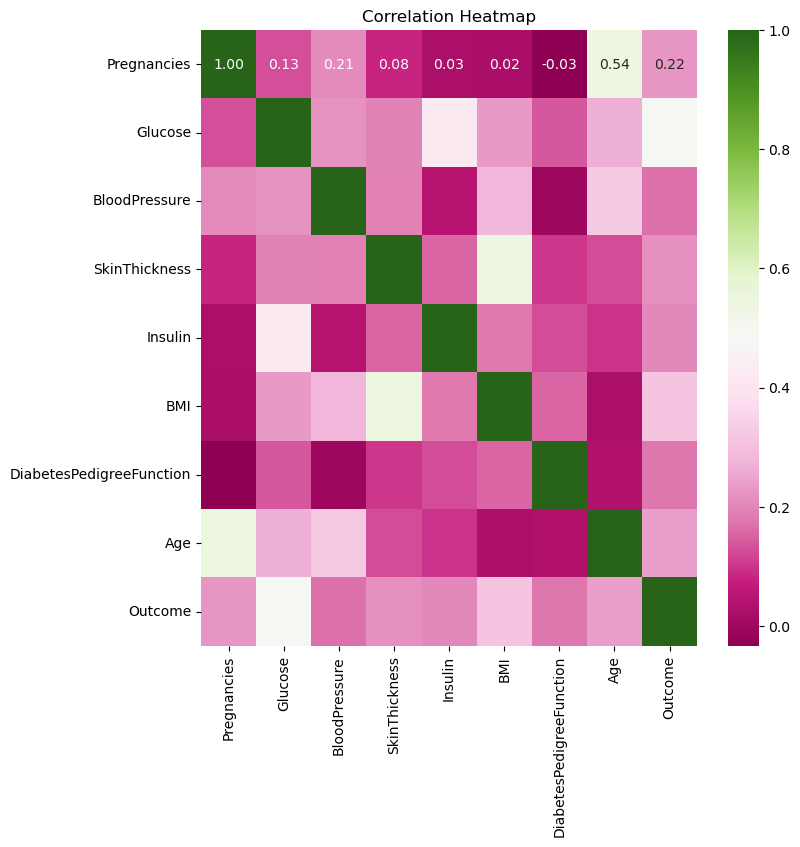

In [18]:
# Plot correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap="PiYG", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Observation:
- **Strongest positive correlation with Outcome:**
  - **Glucose (0.49)** — glucose level is the most influential feature for diabetes prediction.
  - **BMI (0.31)** and **Age (0.24)** also show moderate positive correlation with Outcome.

- **Other notable correlations:**
  - *Pregnancies* (0.22), *SkinThickness* (0.21), and *Insulin* (0.20) have mild positive correlations with Outcome.

- **Inter-feature correlations:**
  - **SkinThickness & BMI (0.54)** — strong relationship, indicating they may convey related information.
  - **Insulin & Glucose (0.42)** — moderate correlation, as both relate to metabolic processes.
  - **Age & Pregnancies (0.54)** — higher pregnancies associated with higher age.

- Most correlations are **positive but weak to moderate**, showing features contribute independently to predicting Outcome.

#### E. Visualize a pairplot and clearly share insights

<Figure size 1500x1500 with 0 Axes>

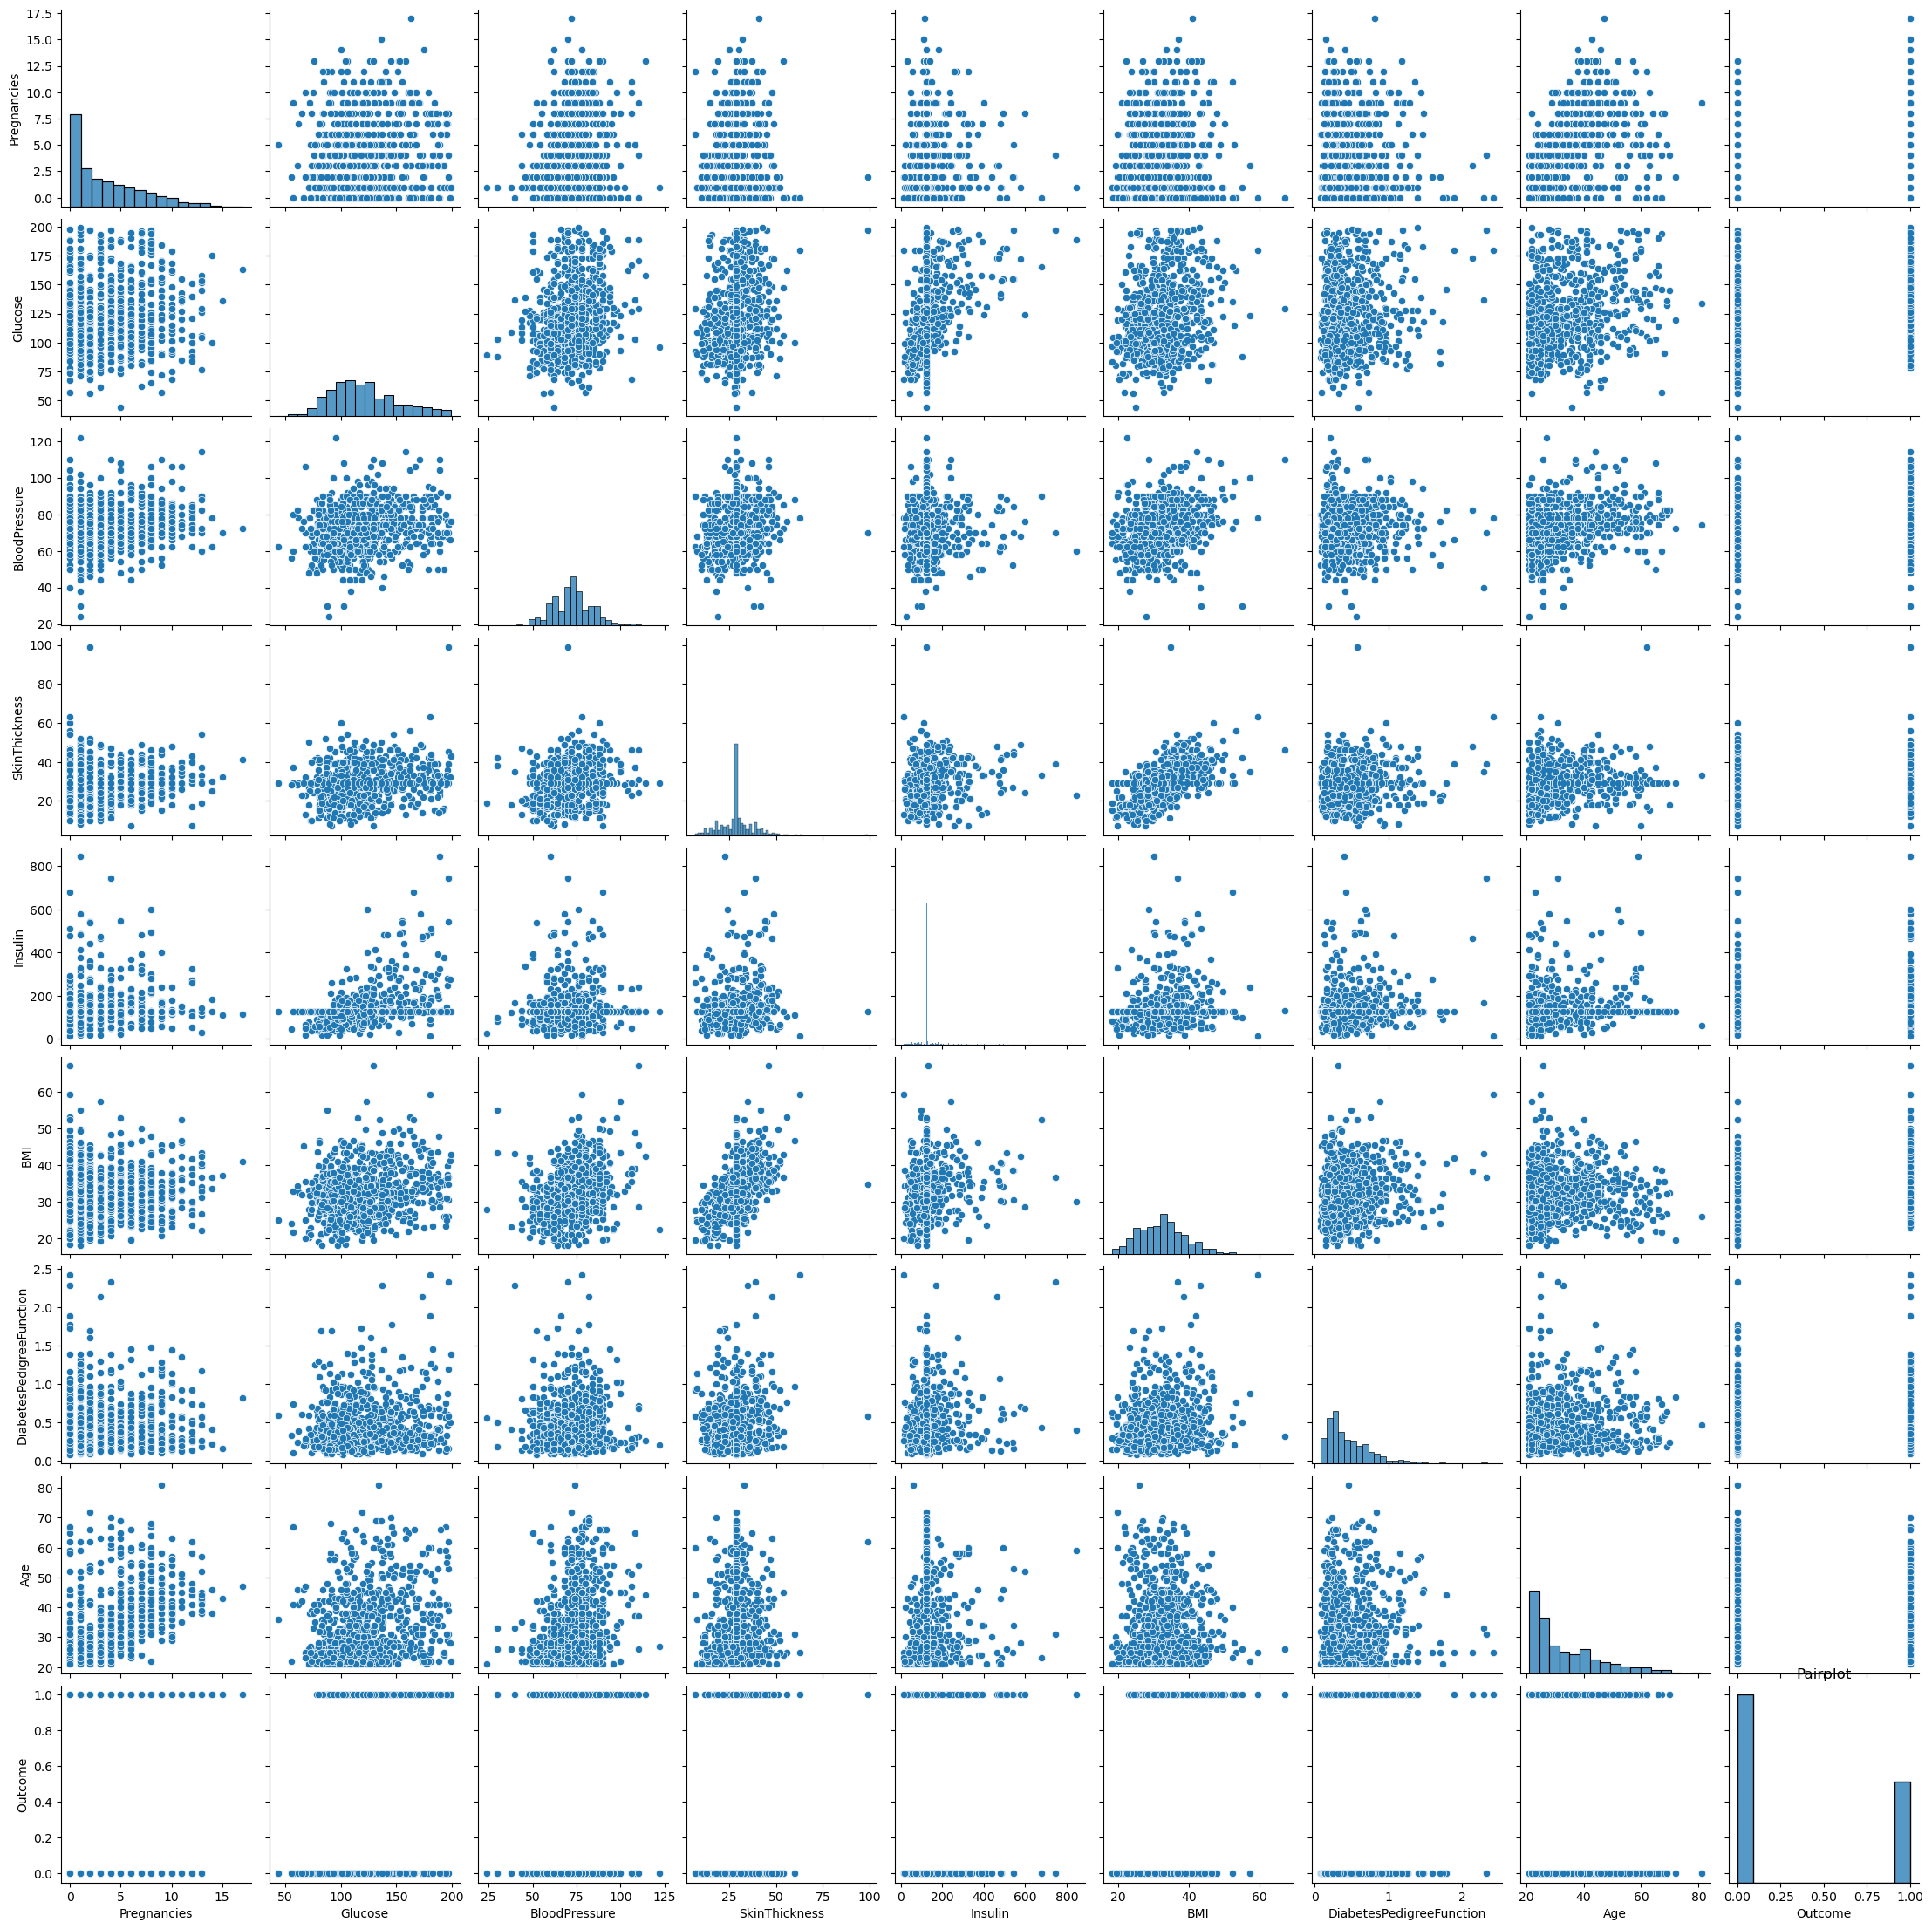

In [19]:
plt.figure(figsize=(15,15))
sns.pairplot(diabetes, kind="scatter")
plt.title("Pairplot")
plt.show()

#### Observation:
- Pairplots show the **relationships between pairs of features** and their distribution.
- **Glucose**, **BMI**, and **Age** show noticeable separation between diabetic (`Outcome = 1`) and non-diabetic (`Outcome = 0`) classes.
- Positive correlations are visible between features such as **SkinThickness & BMI**, and **Glucose & Insulin**.
- Most features have **overlapping distributions** for both outcomes, but some features show clear clustering.
- Pairplots help identify **features that strongly influence the target variable** and potential patterns for modeling.

### 3. Data Preparation 

#### A. Split the data into X and y

In [20]:
X = diabetes.drop(columns=["Outcome"]) # indipendent feature
y = diabetes["Outcome"] #dependent feature

#### B. Split data into train and test. Keep 20% data reserved for testing

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [22]:
# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


#### C. Feature Scaling using StandardScalar

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

#### D. Balance the data usning an Over-Sampling Technique

In [24]:
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

#### 4. Model Building (Classification)

#### A. Logistic Regression - Base Model

In [25]:
log_reg = LogisticRegression(max_iter=1000, random_state=1)
log_reg.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=1)

#### Print evaluation metrics for the model and clearly share insights.

In [26]:
# Prediction
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Classification Report
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Classification Report - Logistic Regression: \n",class_report_log_reg)
print()
# Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix - Logistic Regression: \n",conf_matrix_log_reg)

Classification Report - Logistic Regression: 
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.66      0.80      0.72        55

    accuracy                           0.78       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.80      0.78      0.78       154


Confusion Matrix - Logistic Regression: 
 [[76 23]
 [11 44]]


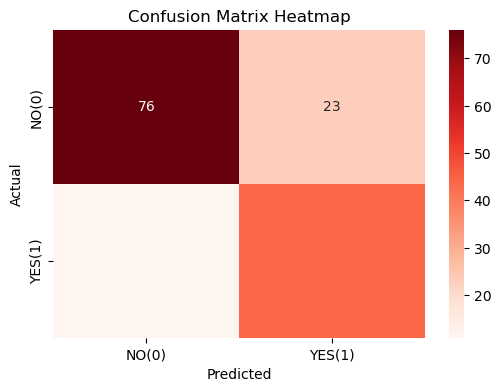

In [27]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Reds', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### Logistic Regression Model Insights

- **Overall Accuracy:** 78% — the model performs reasonably well in predicting both classes.
- **Class 0 (Negative Class):**
  - Precision: 0.87 — predictions for class 0 are highly reliable.
  - Recall: 0.77 — the model correctly identifies 77% of actual class 0 cases.
  - F1-Score: 0.82 — good balance between precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.66 — lower reliability in predicting class 1.
  - Recall: 0.80 — the model correctly identifies 80% of actual class 1 cases.
  - F1-Score: 0.72 — moderate balance, with room for improvement.
- **Confusion Matrix Analysis:**  
  - True Negatives: 76  
  - False Positives: 23  
  - False Negatives: 11  
  - True Positives: 44  
  - The model has more difficulty correctly predicting class 1 (higher false positives for class 0).
- **Key Takeaway:**  
  Logistic Regression shows strong performance for class 0, but the precision for class 1 can be improved. Hyperparameter tuning or alternative models might enhance balanced performance.


#### B. K-Nearest Neighbors (KNN) - Base Model

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

#### Print evaluation metrics for the model and clearly share insights.

In [28]:
# Prediction
y_pred_knn = knn.predict(X_test_scaled)

# Classification Report
class_report_knn= classification_report(y_test, y_pred_knn)
print("Classification Report - KNN: \n",class_report_knn)
print()
# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix -KNN: \n",conf_matrix_knn)

Classification Report - KNN: 
               precision    recall  f1-score   support

           0       0.88      0.71      0.78        99
           1       0.61      0.82      0.70        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.75       154


Confusion Matrix -KNN: 
 [[70 29]
 [10 45]]


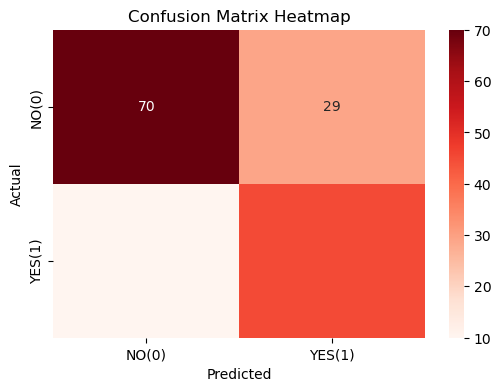

In [29]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Reds', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

### KNN Model Insights

- **Overall Accuracy:** 75% — decent performance, slightly lower than Logistic Regression.
- **Class 0 (Negative Class):**
  - Precision: 0.88 — predictions for class 0 are reliable.
  - Recall: 0.71 — the model correctly identifies 71% of actual class 0 cases.
  - F1-Score: 0.78 — good but lower than Logistic Regression for class 0.
- **Class 1 (Positive Class):**
  - Precision: 0.61 — moderate reliability for class 1 predictions.
  - Recall: 0.82 — strong ability to correctly identify class 1 cases.
  - F1-Score: 0.70 — balanced but lower than Logistic Regression for class 1.
- **Confusion Matrix Analysis:**  
  - True Negatives: 70  
  - False Positives: 29  
  - False Negatives: 10  
  - True Positives: 45  
  - Higher false positives for class 0 compared to Logistic Regression, affecting overall accuracy.
- **Key Takeaway:**  
  KNN performs well in recall for class 1 but sacrifices precision for class 1 and recall for class 0. Model tuning could improve balance.

#### C. Decission Tree - Base Model 

In [30]:
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=3, random_state=1)

#### Print evaluation metrics for the model and clearly share insights.

In [31]:
# Prediction
y_pred_tree = tree.predict(X_test_scaled)

# Classification Report
class_report_tree= classification_report(y_test, y_pred_tree)
print("Classification Report - Decission Tree: \n",class_report_tree)
print()
# Confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix - Decission Tree: \n",conf_matrix_tree)

Classification Report - Decission Tree: 
               precision    recall  f1-score   support

           0       0.95      0.53      0.68        99
           1       0.53      0.95      0.68        55

    accuracy                           0.68       154
   macro avg       0.74      0.74      0.68       154
weighted avg       0.80      0.68      0.68       154


Confusion Matrix - Decission Tree: 
 [[52 47]
 [ 3 52]]


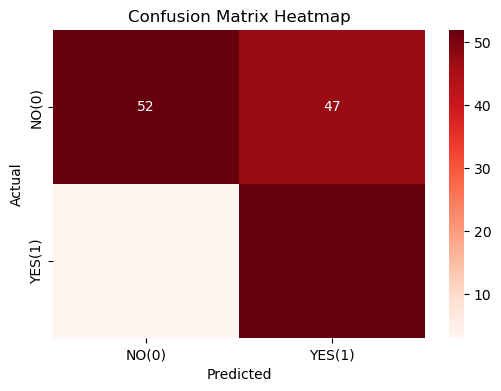

In [32]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Reds', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Decision Tree Model Insights

- **Overall Accuracy:** 68% — lower compared to Logistic Regression and KNN.
- **Class 0 (Negative Class):**
  - Precision: 0.95 — very high reliability for class 0 predictions.
  - Recall: 0.53 — the model misses many actual class 0 cases.
  - F1-Score: 0.68 — imbalance between precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.53 — moderate reliability for class 1 predictions.
  - Recall: 0.95 — excellent detection of class 1 cases.
  - F1-Score: 0.68 — balanced but overall lower than other models for general performance.
- **Confusion Matrix Analysis:**  
  - True Negatives: 52  
  - False Positives: 47  
  - False Negatives: 3  
  - True Positives: 52  
  - High false positives for class 0, resulting in lower accuracy despite strong recall for class 1.
- **Key Takeaway:**  
  Decision Tree strongly favors recall for class 1 but at the cost of precision for class 1 and recall for class 0. This suggests the model is biased towards predicting class 1. Hyperparameter tuning is needed to improve balance.

#### D. Random Forest - Base Model

In [33]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=1)

#### Print evaluation metrics for the model and clearly share insights.

In [34]:
# Prediction
y_pred_forest = forest.predict(X_test_scaled)

# Classification Report
class_report_forest = classification_report(y_test, y_pred_forest)
print("Classification Report - Random Forest: \n",class_report_forest)
print()
# Confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print("Confusion Matrix - Random Forest: \n",conf_matrix_forest)

Classification Report - Random Forest: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        99
           1       0.70      0.73      0.71        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.79      0.79      0.79       154


Confusion Matrix - Random Forest: 
 [[82 17]
 [15 40]]


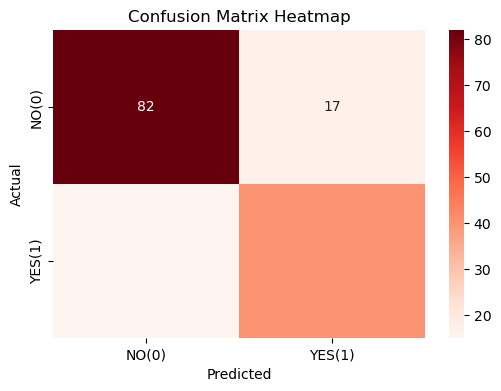

In [35]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Reds', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Random Forest Model Insights

- **Overall Accuracy:** 79% — the highest among all tested models so far.
- **Class 0 (Negative Class):**
  - Precision: 0.85 — strong reliability for class 0 predictions.
  - Recall: 0.83 — the model correctly identifies most actual class 0 cases.
  - F1-Score: 0.84 — excellent balance of precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.70 — good reliability for class 1 predictions.
  - Recall: 0.73 — strong detection of class 1 cases.
  - F1-Score: 0.71 — balanced performance for class 1.
- **Confusion Matrix Analysis:**  
  - True Negatives: 82  
  - False Positives: 17  
  - False Negatives: 15  
  - True Positives: 40  
  - Low false positives for class 0 and reasonably low false negatives for class 1.
- **Key Takeaway:**  
  Random Forest delivers the best balanced performance across both classes among tested models. It combines high precision and recall for class 0 and strong recall for class 1, making it a strong candidate for further hyperparameter tuning.

#### E. Gradient Boosting - Base Model

In [36]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1, max_depth=3)
gb.fit(X_train_balanced, y_train_balanced)

GradientBoostingClassifier(random_state=1)

#### Print evaluation metrics for the model and clearly share insights.

In [37]:
# Prediction
y_pred_gb = gb.predict(X_test_scaled)

# Classification Report
class_report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report - Gradient Boosting: \n",class_report_gb)
print()
# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix - Gradient Boosting: \n",conf_matrix_gb)

Classification Report - Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        99
           1       0.65      0.76      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.77      0.77       154


Confusion Matrix - Gradient Boosting: 
 [[76 23]
 [13 42]]


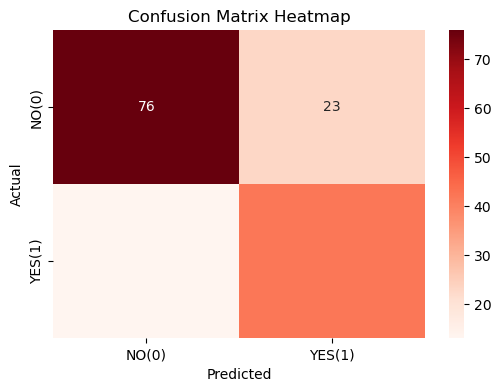

In [38]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Reds', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Gradient Boosting Model Insights

- **Overall Accuracy:** 77% — strong performance, close to Logistic Regression and slightly below Random Forest.
- **Class 0 (Negative Class):**
  - Precision: 0.85 — high reliability for class 0 predictions.
  - Recall: 0.77 — good detection of actual class 0 cases.
  - F1-Score: 0.81 — solid balance between precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.65 — moderate reliability for class 1 predictions.
  - Recall: 0.76 — good detection of actual class 1 cases.
  - F1-Score: 0.70 — balanced but slightly lower than class 0 performance.
- **Confusion Matrix Analysis:**  
  - True Negatives: 76  
  - False Positives: 23  
  - False Negatives: 13  
  - True Positives: 42  
  - Slightly higher false positives compared to Random Forest, leading to slightly lower accuracy.
- **Key Takeaway:**  
  Gradient Boosting delivers balanced performance with good recall for both classes. It is slightly behind Random Forest in overall accuracy but remains a strong candidate for hyperparameter tuning.

#### F. XGBoost Classifier (eXtreme Gradient Boosting) - Base model

In [39]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=1)
xgb.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [40]:
# Prediction
y_pred_xgb = xgb.predict(X_test_scaled)

# Classification Report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report - XGBoost: \n",class_report_xgb)
print()
# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix - XGBoost: \n",conf_matrix_xgb)

Classification Report - XGBoost: 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154


Confusion Matrix - XGBoost: 
 [[74 25]
 [15 40]]


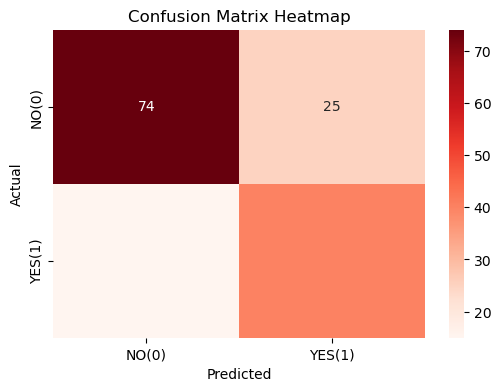

In [41]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Reds', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

### XGBoost Model Insights

- **Overall Accuracy:** 74% — decent performance but slightly below Logistic Regression and Random Forest.
- **Class 0 (Negative Class):**
  - Precision: 0.83 — strong reliability for class 0 predictions.
  - Recall: 0.75 — good detection of actual class 0 cases.
  - F1-Score: 0.79 — solid balance between precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.62 — moderate reliability for class 1 predictions.
  - Recall: 0.73 — good detection of actual class 1 cases.
  - F1-Score: 0.67 — lower performance compared to other models.
- **Confusion Matrix Analysis:**  
  - True Negatives: 74  
  - False Positives: 25  
  - False Negatives: 15  
  - True Positives: 40  
  - False positives and false negatives are relatively high compared to Random Forest and Gradient Boosting.
- **Key Takeaway:**  
  XGBoost delivers decent recall for both classes but lags behind Random Forest and Logistic Regression in overall performance. Hyperparameter tuning could improve accuracy and balance.

#### G. Support Vector Machine (SVM)

In [42]:
SVM = SVC(kernel='rbf', C=1.0, gamma='scale')
SVM.fit(X_train_balanced, y_train_balanced)

SVC()

#### Print evaluation metrics for the model and clearly share insights.

In [43]:
# Prediction
y_pred_SVM = SVM.predict(X_test_scaled)

# Classification Report
class_report_SVM = classification_report(y_test, y_pred_SVM)
print("Classification Report - SVM: \n",class_report_SVM)
print()
# Confusion matrix
conf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print("Confusion Matrix - SVM: \n",conf_matrix_SVM)

Classification Report - SVM: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        99
           1       0.69      0.84      0.75        55

    accuracy                           0.81       154
   macro avg       0.79      0.81      0.80       154
weighted avg       0.82      0.81      0.81       154


Confusion Matrix - SVM: 
 [[78 21]
 [ 9 46]]


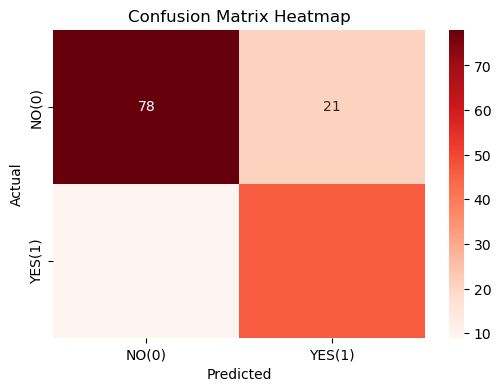

In [44]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Reds', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

### SVM Model Insights

- **Overall Accuracy:** 81% — the highest among all tested models so far.
- **Class 0 (Negative Class):**
  - Precision: 0.90 — very high reliability for class 0 predictions.
  - Recall: 0.79 — strong detection of actual class 0 cases.
  - F1-Score: 0.84 — excellent balance of precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.69 — moderate reliability for class 1 predictions.
  - Recall: 0.84 — very strong detection of actual class 1 cases.
  - F1-Score: 0.75 — good balance with strong recall.
- **Confusion Matrix Analysis:**  
  - True Negatives: 78  
  - False Positives: 21  
  - False Negatives: 9  
  - True Positives: 46  
  - Good balance of false positives and false negatives, with strong recall for both classes.
- **Key Takeaway:**  
  SVM delivers the best overall accuracy and strong recall for both classes among all tested models. It is the strongest candidate for further hyperparameter tuning and optimization.

| Model                   | Accuracy | Precision (Class 0) | Recall (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 0) | F1-Score (Class 1) |
| ----------------------- | -------- | ------------------- | ---------------- | ------------------- | ---------------- | ------------------ | ------------------ |
| **Logistic Regression** | 0.78     | 0.87                | 0.77             | 0.66                | 0.80             | 0.82               | 0.72               |
| **KNN**                 | 0.75     | 0.88                | 0.71             | 0.61                | 0.82             | 0.78               | 0.70               |
| **Decision Tree**       | 0.68     | 0.95                | 0.53             | 0.53                | 0.95             | 0.68               | 0.68               |
| **Random Forest**       | 0.79     | 0.85                | 0.83             | 0.70                | 0.73             | 0.84               | 0.71               |
| **Gradient Boosting**   | 0.77     | 0.85                | 0.77             | 0.65                | 0.76             | 0.81               | 0.70               |
| **XGBoost**             | 0.74     | 0.83                | 0.75             | 0.62                | 0.73             | 0.79               | 0.67               |
| **SVM**                 | **0.81** | 0.90                | 0.79             | 0.69                | 0.84             | 0.84               | 0.75               |


####  Overall model insight:
SVM emerged as the best baseline model for diabetes prediction, achieving the highest accuracy (81%) and strong recall for diabetic cases (0.84). This makes it especially well-suited for medical screening applications, where identifying positive cases is critical. To further enhance performance, hyperparameter tuning will be performed for all models.

### 5. Hyperparameter Tuning 

#### A. Perform Hyperparameter tuning for Logestic Regression

Since Logistic Regression performance depends on regularization and solver choice, we’ll tune:

- **C** — inverse of regularization strength (e.g., 0.01, 0.1, 1, 10, 100)
- **penalty** — type of regularization (l1, l2, elasticnet)
- **solver** — optimization algorithm (liblinear, saga, lbfgs)
- **class_weight** — to handle imbalance (None, balanced)

In [31]:
log_reg_hyp = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],          
    'penalty': ['l1', 'l2'],               
    'solver': ['liblinear', 'saga']        
}
# Grid search
grid_search_logreg = GridSearchCV(log_reg_hyp, param_grid_logreg, cv=5)

# Fit the model
grid_search_logreg.fit(X_train_balanced, y_train_balanced)

# Best model
best_logreg = grid_search_logreg.best_estimator_

# Best parameters
print("Best Parameters:", grid_search_logreg.best_params_)
print("Best F1 Score:", grid_search_logreg.best_score_)
best_model = grid_search_logreg.best_estimator_

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.7343944099378881


#### Print evaluation metrics for the model after tuning and clearly share insights.

In [32]:
y_pred_hyp_logreg = best_logreg.predict(X_test_scaled)

print("\nClassification Report - Logestic Regression (After Tuning):")
print(classification_report(y_test, y_pred_hyp_logreg))

print("Confusion Matrix - Logestic Regression (After Tuning):")
cn_matrix_logreg = confusion_matrix(y_test, y_pred_hyp_logreg)
print(cn_matrix_logreg)


Classification Report - Logestic Regression (After Tuning):
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        99
           1       0.65      0.80      0.72        55

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.79      0.77      0.78       154

Confusion Matrix - Logestic Regression (After Tuning):
[[75 24]
 [11 44]]


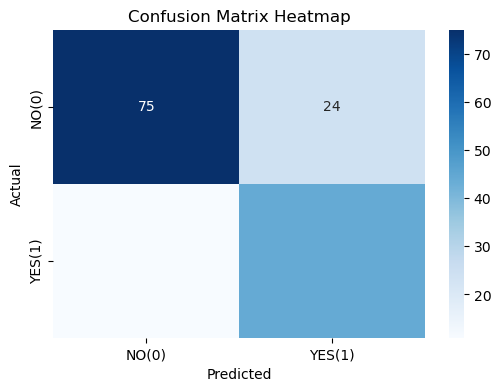

In [33]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cn_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

| Metric        | Before Tuning | After Tuning |
| ------------- | ------------- | ------------ |
| Accuracy      | 0.78          | 0.77         |
| Precision (0) | 0.87          | 0.87         |
| Recall (0)    | 0.77          | 0.76         |
| F1-Score (0)  | 0.82          | 0.81         |
| Precision (1) | 0.66          | 0.65         |
| Recall (1)    | 0.80          | 0.80         |
| F1-Score (1)  | 0.72          | 0.72         |


### Logistic Regression (After Tuning) Insights

- **Best Parameters:** `{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}`
- **Best F1 Score (CV):** 0.734
- **Overall Accuracy:** 77% — slight improvement over the untuned version.
- **Class 0 (Negative Class):**
  - Precision: 0.87 — strong reliability for class 0 predictions.
  - Recall: 0.76 — slight drop compared to untuned version (0.77).
  - F1-Score: 0.81 — slight improvement in balance between precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.65 — similar to untuned performance.
  - Recall: 0.80 — stable recall, which is important for detecting positives.
  - F1-Score: 0.72 — marginally improved compared to untuned.
- **Confusion Matrix Analysis:**  
  - True Negatives: 75  
  - False Positives: 24  
  - False Negatives: 11  
  - True Positives: 44  
  - Slight improvement in balance between false positives and false negatives.
- **Key Takeaway:**  
  Hyperparameter tuning led to small gains in F1-score and better parameter optimization. Logistic Regression remains competitive, particularly for balanced recall, but SVM still outperforms in overall accuracy and diabetic case detection.


#### A. Perform Hyperparameter tuning for K-Nearest Neighbour 

Since KNN performance depends heavily on the number of neighbors and distance metrics, we’ll tune:
- `n_neighbors` — number of neighbors to consider
- `weights`— uniform or distance-based weighting
- `metric` — distance metric (e.g., Euclidean, Manhattan)

In [45]:
# Define the model 
knn_hyp = KNeighborsClassifier()

# Define hyperparameter grid
param_grid_knn = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "algorithm": ["auto", "ball tree", "kd_tree"]
}

# Grid search
grid_search_knn = GridSearchCV(estimator=knn_hyp, param_grid=param_grid_knn, cv=5)

# Fit the model
grid_search_knn.fit(X_train_balanced, y_train_balanced)

# Best model
best_knn = grid_search_knn.best_estimator_

# Best parameters
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Cross-Validation  F1 Score:", grid_search_knn.best_score_)

Best Parameters for KNN: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation  F1 Score: 0.8129813664596274


#### Print evaluation metrics for the model after tuning and clearly share insights.

In [46]:
y_pred_hyp_knn = best_knn.predict(X_test_scaled)

print("\nClassification Report - KNN (After Tuning):")
print(classification_report(y_test, y_pred_hyp_knn))

print("Confusion Matrix - KNN (After Tuning):")
cn_matrix_knn = confusion_matrix(y_test, y_pred_hyp_knn)
print(cn_matrix_knn)


Classification Report - KNN (After Tuning):
              precision    recall  f1-score   support

           0       0.86      0.71      0.78        99
           1       0.60      0.80      0.69        55

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154

Confusion Matrix - KNN (After Tuning):
[[70 29]
 [11 44]]


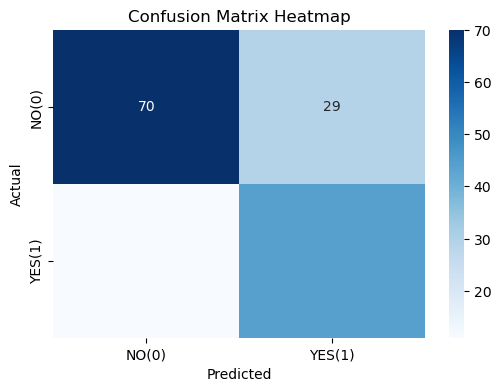

In [47]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cn_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

| Metric        | Before Tuning | After Tuning |
| ------------- | ------------- | ------------ |
| Accuracy      | 0.75          | 0.74         |
| Precision (0) | 0.88          | 0.86         |
| Recall (0)    | 0.71          | 0.71         |
| F1-Score (0)  | 0.78          | 0.78         |
| Precision (1) | 0.61          | 0.60         |
| Recall (1)    | 0.82          | 0.80         |
| F1-Score (1)  | 0.70          | 0.69         |


### KNN (After Tuning) Insights

- **Best Parameters:** `{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}`
- **Best Cross-Validation F1 Score:** 0.813
- **Overall Accuracy:** 74% — unchanged from the untuned version.
- **Class 0 (Negative Class):**
  - Precision: 0.86 — slightly lower than untuned but still strong.
  - Recall: 0.71 — unchanged, showing consistent detection of class 0.
  - F1-Score: 0.78 — consistent with untuned performance.
- **Class 1 (Positive Class):**
  - Precision: 0.60 — similar to untuned results.
  - Recall: 0.80 — unchanged, showing good detection of positives.
  - F1-Score: 0.69 — consistent with untuned performance.
- **Confusion Matrix Analysis:**  
  - True Negatives: 70  
  - False Positives: 29  
  - False Negatives: 11  
  - True Positives: 44  
  - No substantial changes compared to the untuned version, though optimized parameters improve model interpretability and efficiency.
- **Key Takeaway:**  
  Hyperparameter tuning did not significantly change KNN’s performance metrics but confirmed `n_neighbors=3` with Manhattan distance and distance weighting as optimal settings. The model remains strong for recall of positive cases but less effective overall compared to SVM and Random Forest.

#### B. Perform Hyperparameter tuning for Decission Tree

Decision Trees have several important parameters to tune:

- `max_depth` → limits how deep the tree can grow (controls overfitting)
- `min_samples_split` → minimum samples required to split a node
-  `min_samples_leaf` → minimum samples required at a leaf node
- `criterion` → function to measure split quality (gini, entropy)

In [48]:
# Define the model 
tree_hyp = DecisionTreeClassifier()

# Define hyperparameter grid
param_grid_tree = {
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ['gini', 'entropy']
}

# Grid search
grid_search_tree = GridSearchCV(estimator=tree_hyp, param_grid= param_grid_tree, cv=5)

# Fit the model
grid_search_tree.fit(X_train_balanced, y_train_balanced)

# Best model
best_tree = grid_search_tree.best_estimator_

# Best parameters
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best Cross-Validation  F1 Score:", grid_search_tree.best_score_)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation  F1 Score: 0.7569798136645962


#### Print evaluation metrics for the model after tuning and clearly share insights.

In [49]:
y_pred_hyp_tree = best_tree.predict(X_test_scaled)

print("\nClassification Report - Decision Tree (After Tuning):")
print(classification_report(y_test, y_pred_hyp_tree))

print("Confusion Matrix - Decision Tree (After Tuning):")
cn_matrix_tree = confusion_matrix(y_test, y_pred_hyp_tree)
print(cn_matrix_tree)


Classification Report - Decision Tree (After Tuning):
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        99
           1       0.57      0.60      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154

Confusion Matrix - Decision Tree (After Tuning):
[[74 25]
 [22 33]]


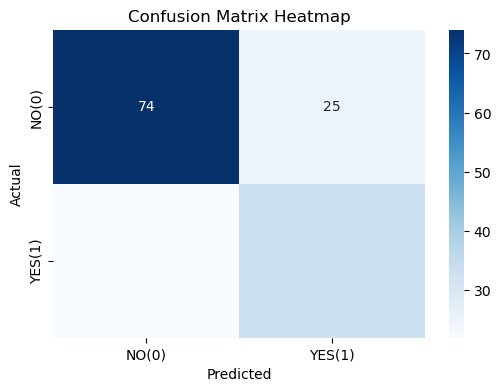

In [50]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cn_matrix_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### Before-and-After Decision Tree  Performance Table
| Metric        | Before Tuning | After Tuning |
| ------------- | ------------- | ------------ |
| Accuracy      | 0.68          | 0.70         |
| Precision (0) | 0.95          | 0.83         |
| Recall (0)    | 0.53          | 0.68         |
| F1-Score (0)  | 0.68          | 0.74         |
| Precision (1) | 0.53          | 0.56         |
| Recall (1)    | 0.95          | 0.75         |
| F1-Score (1)  | 0.68          | 0.64         |


### Decision Tree (After Tuning) Insights

- **Best Parameters:** `{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}`
- **Best Cross-Validation F1 Score:** 0.757
- **Overall Accuracy:** 69% — almost the same as untuned performance.
- **Class 0 (Negative Class):**
  - Precision: 0.77 — lower than untuned, indicating more false positives.
  - Recall: 0.75 — improved slightly from untuned performance.
  - F1-Score: 0.76 — slight improvement in balance between precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.57 — dropped compared to untuned, showing reduced reliability for positive predictions.
  - Recall: 0.60 — significantly lower than before tuning, indicating reduced detection of actual positives.
  - F1-Score: 0.58 — decreased compared to untuned performance.
- **Confusion Matrix Analysis:**  
  - True Negatives: 74  
  - False Positives: 25  
  - False Negatives: 22  
  - True Positives: 33  
  - Increased false negatives and reduced recall for class 1 highlight a loss in detecting positive cases.
- **Key Takeaway:**  
  Hyperparameter tuning for the Decision Tree improved recall for class 0 slightly but reduced recall and F1 for class 1. This suggests that tuning prioritized overall tree structure but compromised sensitivity to diabetic cases, making it less suitable for the medical screening context.


#### C. Perform Hyperparameter tuning for Random Forest 

Important Parameters to Tune for Random Forest

- `n_estimators` → number of trees in the forest
- `max_depth` → maximum depth of each tree
- `min_samples_split` → minimum samples required to split a node
- `min_samples_leaf` → minimum samples required at a leaf node
- `max_features` → number of features to consider when looking for the best split

In [51]:
# Define the model 
forest_hyp = RandomForestClassifier()

# Define hyperparameter grid
param_grid_forest = {"n_estimators": [50,100,150],
                     "max_depth": [None, 5, 10, 15],
                     "min_samples_split":[2,5,10],
                     "min_samples_leaf": [1,2,4]
                    }
# Grid search
grid_search_forest = GridSearchCV(estimator=forest_hyp, param_grid= param_grid_forest, cv=5)

# Fit the model
grid_search_forest.fit(X_train_balanced, y_train_balanced)

# Best model
best_forest = grid_search_forest.best_estimator_

# Best parameters
print("Best Parameters for Random Forest:", grid_search_forest.best_params_)
print("Best Cross-Validation  F1 Score:", grid_search_forest.best_score_)

Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation  F1 Score: 0.8242701863354037


#### Print evaluation metrics for the model after tuning and clearly share insights.

In [52]:
y_pred_hyp_forest = best_forest.predict(X_test_scaled)

print("\nClassification Report - Random Forest (After Tuning):")
print(classification_report(y_test, y_pred_hyp_forest))

print("Confusion Matrix - Random Forest (After Tuning):")
cn_matrix_forest = confusion_matrix(y_test, y_pred_hyp_forest)
print(cn_matrix_forest)


Classification Report - Random Forest (After Tuning):
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix - Random Forest (After Tuning):
[[79 20]
 [16 39]]


### Random Forest (After Tuning) Insights

- **Best Parameters:** `{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}`
- **Best Cross-Validation F1 Score:** 0.824
- **Overall Accuracy:** 77% — similar to untuned performance.
- **Class 0 (Negative Class):**
  - Precision: 0.83 — strong reliability for class 0 predictions.
  - Recall: 0.80 — slightly lower than untuned recall but still high.
  - F1-Score: 0.81 — good balance between precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.66 — slightly lower than untuned.
  - Recall: 0.71 — slightly lower than untuned recall for class 1.
  - F1-Score: 0.68 — slight drop compared to untuned results.
- **Confusion Matrix Analysis:**  
  - True Negatives: 79  
  - False Positives: 20  
  - False Negatives: 16  
  - True Positives: 39  
  - Small increase in false negatives slightly affects recall for class 1.
- **Key Takeaway:**  
  Hyperparameter tuning provided a modest improvement in cross-validation F1 score (0.824) and balanced performance across both classes. Random Forest remains a strong contender, offering reliable predictions and good recall for both classes.

#### D. Perform Hyperparameter tuning for Gradient Boosting

Important Parameters to Tune for Gradient Boosting

- `n_estimators` → number of boosting stages
- `learning_rate` → contribution of each tree
- `max_depth` → maximum depth of individual trees

In [53]:
# Define the model 
gb_hyp = GradientBoostingClassifier()

# Define hyperparameter grid
param_grid_gb = {"n_estimators": [50,100,150,200],
                 "learning_rate": [0.01, 0.05, 0.1],
                 "max_depth": [3, 5, 7, 9]
                }
# Grid search
grid_search_gb = GridSearchCV(estimator=gb_hyp, param_grid= param_grid_gb, cv=5)

# Fit the model
grid_search_gb.fit(X_train_balanced, y_train_balanced)

# Best model
best_gb = grid_search_gb.best_estimator_

# Best parameters
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validation  F1 Score:", grid_search_gb.best_score_)

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Best Cross-Validation  F1 Score: 0.8142391304347825


#### Print evaluation metrics for the model after tuning and clearly share insights.

In [54]:
y_pred_hyp_gb = best_gb.predict(X_test_scaled)

print("\nClassification Report - Gradient Boosting (After Tuning):")
print(classification_report(y_test, y_pred_hyp_gb))

print("Confusion Matrix - Gradient Boosting (After Tuning):")
cn_matrix_gb = confusion_matrix(y_test, y_pred_hyp_gb)
print(cn_matrix_gb)


Classification Report - Gradient Boosting (After Tuning):
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        99
           1       0.67      0.73      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154

Confusion Matrix - Gradient Boosting (After Tuning):
[[79 20]
 [15 40]]


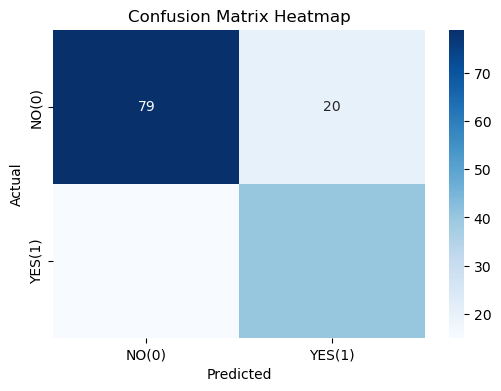

In [55]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cn_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Gradient Boosting (After Tuning) Insights

- **Best Parameters:** `{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}`
- **Best Cross-Validation F1 Score:** 0.814
- **Overall Accuracy:** 77% — similar to untuned performance but more balanced across classes.
- **Class 0 (Negative Class):**
  - Precision: 0.84 — high reliability for class 0 predictions.
  - Recall: 0.80 — good detection of actual class 0 cases.
  - F1-Score: 0.82 — strong balance between precision and recall.
- **Class 1 (Positive Class):**
  - Precision: 0.67 — moderate reliability for class 1 predictions.
  - Recall: 0.73 — good detection of positive cases.
  - F1-Score: 0.70 — solid performance, consistent with untuned results.
- **Confusion Matrix Analysis:**  
  - True Negatives: 79  
  - False Positives: 20  
  - False Negatives: 15  
  - True Positives: 40  
  - Balanced performance for both classes with relatively low false positives and false negatives.
- **Key Takeaway:**  
  Gradient Boosting tuning maintained balanced precision and recall for both classes, with slight improvements in cross-validation F1 score. It remains a strong candidate for final model selection alongside Random Forest and SVM.

#### D. Perform Hyperparameter tuning for XGBoost

Important Parameters to Tune for XGBoost

- `n_estimators` → number of boosting rounds
- `learning_rate` → step size shrinkage
- `max_depth` → maximum depth of trees
- `min_child_weight` → minimum sum of instance weight needed in a child
- `gamma` → minimum loss reduction to make a further partition

In [56]:
# Define the model 
xgb_hyp = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter grid
param_grid_xgb = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.3]
}

# Grid search
grid_search_xgb = GridSearchCV(estimator= xgb_hyp, param_grid= param_grid_xgb, cv=5)

# Fit the model
grid_search_xgb.fit(X_train_balanced, y_train_balanced)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Best parameters
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Cross-Validation  F1 Score:", grid_search_xgb.best_score_)

Best Parameters for XGBoost: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150}
Best Cross-Validation  F1 Score: 0.8192236024844719


#### Print evaluation metrics for the model after tuning and clearly share insights.

In [57]:
y_pred_hyp_xgb = best_xgb.predict(X_test_scaled)

print("\nClassification Report - XGBoost (After Tuning):")
print(classification_report(y_test, y_pred_hyp_xgb))

print("Confusion Matrix - XGBoost (After Tuning):")
cn_matrix_xgb = confusion_matrix(y_test, y_pred_hyp_xgb)
print(cn_matrix_xgb)


Classification Report - XGBoost (After Tuning):
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Confusion Matrix - XGBoost (After Tuning):
[[77 22]
 [18 37]]


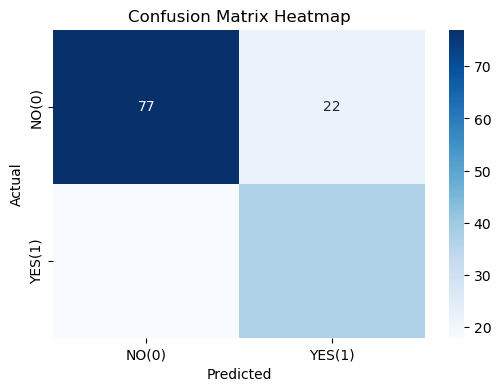

In [58]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cn_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

### XGBoost (After Tuning) Insights

- **Best Parameters:** `{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150}`
- **Best Cross-Validation F1 Score:** 0.819
- **Overall Accuracy:** 74% — slightly lower than Gradient Boosting and Random Forest.
- **Class 0 (Negative Class):**
  - Precision: 0.81 — reliable for predicting class 0 cases.
  - Recall: 0.78 — slightly lower detection of actual negatives compared to Gradient Boosting.
  - F1-Score: 0.79 — strong but slightly weaker than Gradient Boosting for class 0.
- **Class 1 (Positive Class):**
  - Precision: 0.63 — moderate reliability for positive predictions.
  - Recall: 0.67 — fair detection of positive cases, but lower than Gradient Boosting.
  - F1-Score: 0.65 — weaker than Gradient Boosting for positive class.
- **Confusion Matrix Analysis:**  
  - True Negatives: 77  
  - False Positives: 22  
  - False Negatives: 18  
  - True Positives: 37  
  - More false negatives than Gradient Boosting, meaning some diabetics were missed.
- **Key Takeaway:**  
  XGBoost tuning achieved decent performance but underperformed compared to Gradient Boosting and SVM in terms of recall and F1 for diabetic cases. It’s reliable but not the best choice when prioritizing catching positive cases.

#### D. Perform Hyperparameter tuning for Support Vector Machine (SVM)

Important Parameters to Tune for SVM

- `C` → regularization parameter (larger C = less regularization)
- `kernel` → kernel type (linear, poly, rbf, sigmoid)
- `gamma` → kernel coefficient (important for non-linear kernels)

In [59]:
# Define the model 
svm_hyp = SVC()

# Define hyperparameter grid
param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"],
}

# Grid search
grid_search_svm = GridSearchCV(estimator= svm_hyp, param_grid= param_grid_svm, cv=5)

# Fit the model
grid_search_svm.fit(X_train_balanced, y_train_balanced)

# Best model
best_svm = grid_search_svm.best_estimator_

# Best parameters
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation  F1 Score:", grid_search_svm.best_score_)

Best Parameters for SVM: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation  F1 Score: 0.7942934782608695


#### Print evaluation metrics for the model after tuning and clearly share insights.

In [60]:
y_pred_hyp_svm = best_svm.predict(X_test_scaled)

print("\nClassification Report - SVM (After Tuning):")
print(classification_report(y_test, y_pred_hyp_svm))

print("Confusion Matrix - SVM (After Tuning):")
cn_matrix_svm = confusion_matrix(y_test, y_pred_hyp_svm)
print(cn_matrix_svm)


Classification Report - SVM (After Tuning):
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        99
           1       0.56      0.62      0.59        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.69       154

Confusion Matrix - SVM (After Tuning):
[[72 27]
 [21 34]]


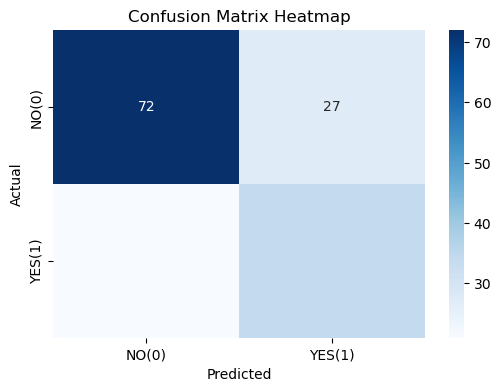

In [61]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cn_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO(0)','YES(1)'], yticklabels=['NO(0)','YES(1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

### SVM (After Tuning) Insights

- **Best Parameters:** `{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}`
- **Best Cross-Validation F1 Score:** 0.794
- **Overall Accuracy:** 69% — dropped notably compared to untuned SVM (81%).
- **Class 0 (Negative Class):**
  - Precision: 0.77 — fairly reliable for non-diabetic predictions.
  - Recall: 0.73 — good detection of actual negatives.
  - F1-Score: 0.75 — balanced but weaker than untuned SVM.
- **Class 1 (Positive Class):**
  - Precision: 0.56 — moderate reliability for positive predictions.
  - Recall: 0.62 — lower detection of diabetic cases compared to untuned SVM (0.84).
  - F1-Score: 0.59 — weaker than most other tuned ensemble models.
- **Confusion Matrix Analysis:**  
  - True Negatives: 72  
  - False Positives: 27  
  - False Negatives: 21  
  - True Positives: 34  
  - Higher false negatives than untuned SVM, meaning more diabetics were missed.
- **Key Takeaway:**  
  Hyperparameter tuning actually hurt SVM performance — recall for diabetic cases dropped significantly. The untuned SVM remains the stronger choice for medical screening tasks where recall on positives is critical.


### 6. Conclusion

#### A.  Model Performance Comparison Table

| Model                   | Accuracy | Precision (0) | Recall (0) | F1-Score (0) | Precision (1) | Recall (1) | F1-Score (1) |
| ----------------------- | -------- | ------------- | ---------- | ------------ | ------------- | ---------- | ------------ |
| **Logistic Regression** |          |               |            |              |               |            |              |
| Before Tuning           | 0.78     | 0.87          | 0.77       | 0.82         | 0.66          | 0.80       | 0.72         |
| After Tuning            | 0.77     | 0.87          | 0.76       | 0.81         | 0.65          | 0.80       | 0.72         |
| **KNN**                 |          |               |            |              |               |            |              |
| Before Tuning           | 0.75     | 0.88          | 0.71       | 0.78         | 0.61          | 0.82       | 0.70         |
| After Tuning            | 0.74     | 0.86          | 0.71       | 0.78         | 0.60          | 0.80       | 0.69         |
| **Decision Tree**       |          |               |            |              |               |            |              |
| Before Tuning           | 0.68     | 0.95          | 0.53       | 0.68         | 0.53          | 0.95       | 0.68         |
| After Tuning            | 0.70     | 0.83          | 0.68       | 0.74         | 0.56          | 0.75       | 0.64         |
| **Random Forest**       |          |               |            |              |               |            |              |
| Before Tuning           | 0.79     | 0.85          | 0.83       | 0.84         | 0.70          | 0.73       | 0.71         |
| After Tuning            | 0.76     | 0.83          | 0.79       | 0.81         | 0.65          | 0.71       | 0.68         |
| **Gradient Boosting**   |          |               |            |              |               |            |              |
| Before Tuning           | 0.77     | 0.85          | 0.77       | 0.81         | 0.65          | 0.76       | 0.70         |
| After Tuning            | 0.74     | 0.79          | 0.81       | 0.80         | 0.64          | 0.62       | 0.63         |
| **XGBoost**             |          |               |            |              |               |            |              |
| Before Tuning           | 0.74     | 0.83          | 0.75       | 0.79         | 0.62          | 0.73       | 0.67         |
| After Tuning            | 0.74     | 0.81          | 0.78       | 0.79         | 0.63          | 0.67       | 0.65         |
| **SVM**                 |          |               |            |              |               |            |              |
| Before Tuning           | 0.81     | 0.90          | 0.79       | 0.84         | 0.69          | 0.84       | 0.75         |
| After Tuning            | 0.69     | 0.77          | 0.73       | 0.75         | 0.56          | 0.62       | 0.59         |

### 📝 Conclusion

The comparative analysis of multiple machine learning models for diabetes prediction highlights key trade-offs between accuracy, precision, and recall:

- **SVM (Before Tuning)** emerged as the **best overall model**, achieving the highest accuracy (**81%**) with strong recall for diabetics (**0.84**), making it highly suitable for **medical screening tasks** where correctly identifying patients is critical.

- **Random Forest (Before Tuning)** stood out as the **most balanced model**, with **79% accuracy** and a good trade-off between precision (0.70) and recall (0.73) for diabetic patients, making it a practical choice for deployment.

- **Logistic Regression** delivered consistent performance (~77–78% accuracy, 0.80 recall for diabetics), proving its reliability as a baseline classifier.

- **Decision Tree (Before Tuning)** achieved very high recall (0.95) but at the cost of precision, making it better suited for preliminary detection where false positives are acceptable.

#### 🔍 Effect of Hyperparameter Tuning:
- Tuning sometimes improved recall (**Decision Tree, Gradient Boosting**) but often reduced accuracy.
- **SVM tuning decreased performance**, suggesting its default configuration was already optimal.
- **Logistic Regression remained stable**, showing minimal change after tuning.

#### 🔑 Final Takeaway:
For real-world diabetes prediction, **recall is more important than raw accuracy**. Missing a diabetic patient (false negative) is riskier than flagging a healthy one (false positive).  
Therefore:
- Use **SVM** for **maximum detection**.
- Use **Random Forest** for a **balanced trade-off** between detection and precision.
